In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/FireSegmentation/FireSeg_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/FireSegmentation/FireSeg_masks.npy')

In [3]:
X_test = images[10000:12000]
y_test = masks[10000:12000]

In [4]:
images = images[0:10000]
masks = masks[0:10000]

In [5]:
images.shape

(10000, 512, 512, 1)

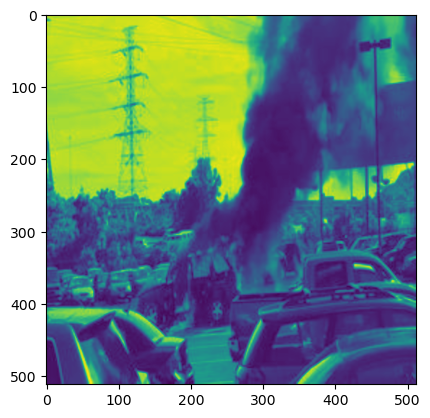

In [6]:
imshow(images[100])

In [7]:
masks.shape

(10000, 512, 512, 1)

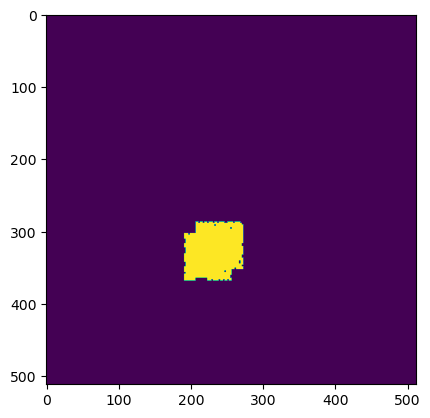

In [8]:
imshow(masks[100])

In [9]:
import sys
sys.path.append('../')
import gp2

In [10]:
from keras import losses

In [11]:
loss_fx = losses.BCE

In [12]:
C = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpx71z76e4kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpkokdi4s1kuc_unet2d


In [13]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpkokdi4s1kuc_unet2d
Verbose mode active!


In [14]:
R.classifier = C ### use custom classifier

In [15]:
R.run(images, masks, runs=5, batch_size=16, shuffle=True, results_file='/raid/mpsych/OMAMA/GP2/results/kuc_unet2d_0kuc_unet2d_model_3_5_fireseg.pkl')

Shuffling data...
Weights OK!
******
Loop 1
Epoch 1/100
32/32 [==============================] - 33s 726ms/step - loss: 0.0373 - dice_coeff: 0.6909 - val_loss: 0.0356 - val_dice_coeff: 0.7152
Epoch 2/100
32/32 [==============================] - 15s 483ms/step - loss: 0.0300 - dice_coeff: 0.7470 - val_loss: 0.0394 - val_dice_coeff: 0.7056
Epoch 3/100
32/32 [==============================] - 15s 486ms/step - loss: 0.0276 - dice_coeff: 0.7641 - val_loss: 0.0362 - val_dice_coeff: 0.7117
Epoch 4/100
32/32 [==============================] - 15s 487ms/step - loss: 0.0241 - dice_coeff: 0.7920 - val_loss: 0.0432 - val_dice_coeff: 0.7170
Epoch 5/100
32/32 [==============================] - 15s 486ms/step - loss: 0.0245 - dice_coeff: 0.7902 - val_loss: 0.0423 - val_dice_coeff: 0.7123
Epoch 6/100
32/32 [==============================] - 15s 483ms/step - loss: 0.0219 - dice_coeff: 0.8113 - val_loss: 0.0430 - val_dice_coeff: 0.7410
Epoch 7/100
32/32 [==============================] - 15s 483ms/step 

Epoch 1/100
57/57 [==============================] - 28s 497ms/step - loss: 0.0168 - dice_coeff: 0.8748 - val_loss: 0.0466 - val_dice_coeff: 0.7256
Epoch 2/100
57/57 [==============================] - 22s 391ms/step - loss: 0.0142 - dice_coeff: 0.8879 - val_loss: 0.0540 - val_dice_coeff: 0.7361
Epoch 3/100
57/57 [==============================] - 22s 391ms/step - loss: 0.0137 - dice_coeff: 0.8931 - val_loss: 0.0521 - val_dice_coeff: 0.7278
Epoch 4/100
57/57 [==============================] - 22s 391ms/step - loss: 0.0107 - dice_coeff: 0.9149 - val_loss: 0.0552 - val_dice_coeff: 0.7483
Epoch 5/100
57/57 [==============================] - 22s 396ms/step - loss: 0.0091 - dice_coeff: 0.9291 - val_loss: 0.0595 - val_dice_coeff: 0.7469
Epoch 6/100
57/57 [==============================] - 22s 393ms/step - loss: 0.0094 - dice_coeff: 0.9264 - val_loss: 0.0625 - val_dice_coeff: 0.7327
Epoch 7/100
57/57 [==============================] - 22s 388ms/step - loss: 0.0096 - dice_coeff: 0.9272 - val_lo

In [16]:
R.classifier_scores

[[0.0651947557926178, 0.7355576157569885],
 [0.06256911903619766, 0.7473292946815491],
 [0.05105320364236832, 0.7166247963905334],
 [0.0659838393330574, 0.7461718916893005],
 [0.05932849645614624, 0.7440322041511536]]

In [17]:
R.discriminator_scores

[[0.030735639855265617, 0.9850000143051147],
 [0.03408747538924217, 0.9883333444595337],
 [0.022693203762173653, 0.9900000095367432],
 [0.02037998102605343, 0.9900000095367432],
 [0.0186409093439579, 0.9933333396911621]]

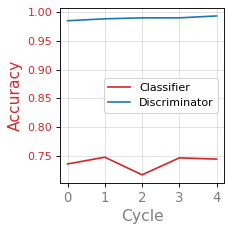

In [18]:
R.plot()

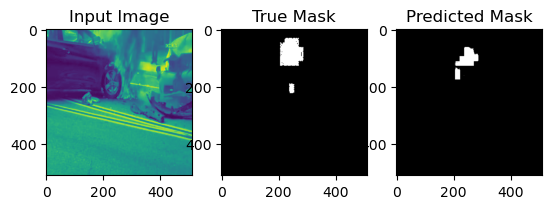

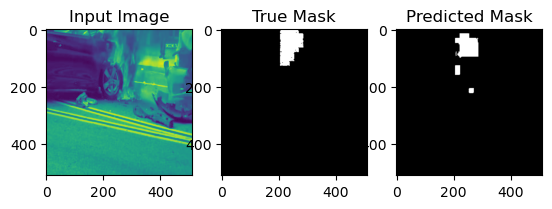

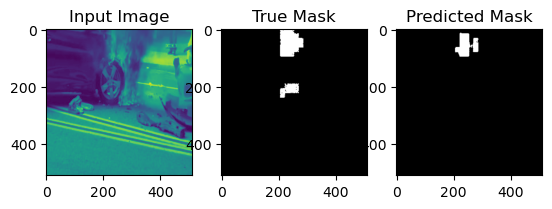

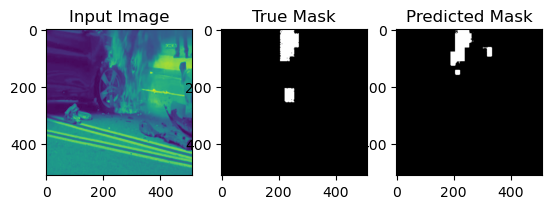

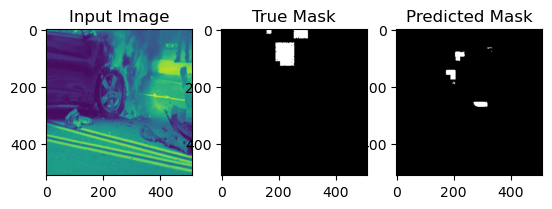

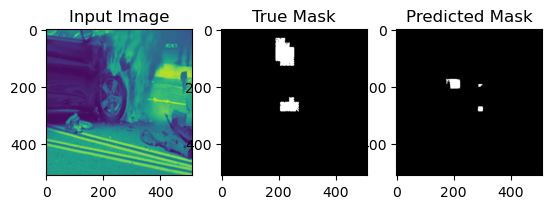

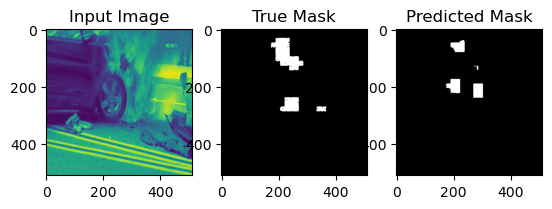

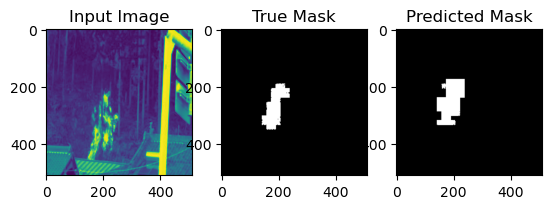

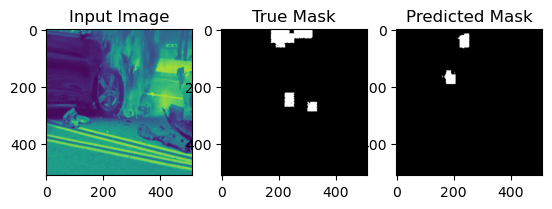

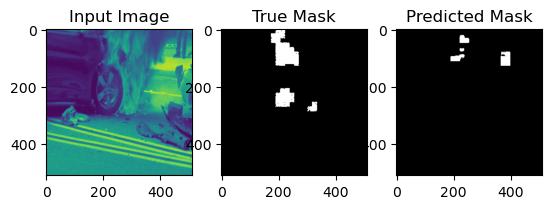

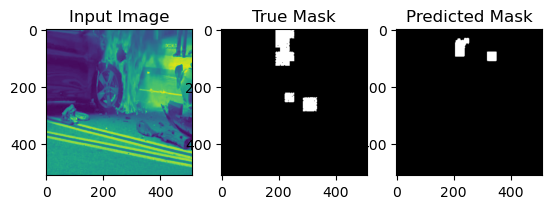

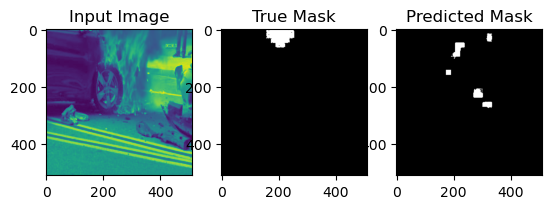

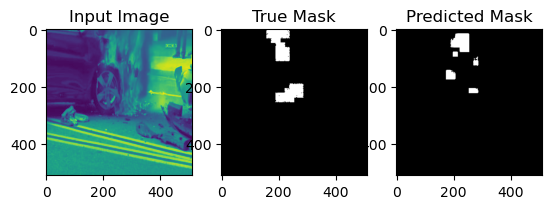

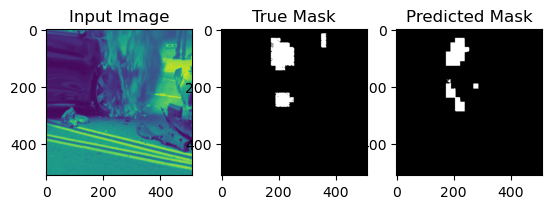

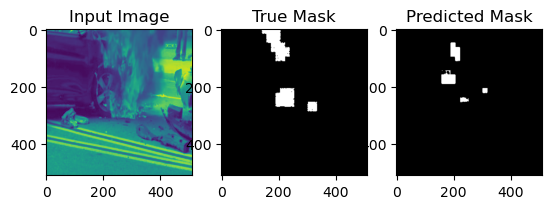

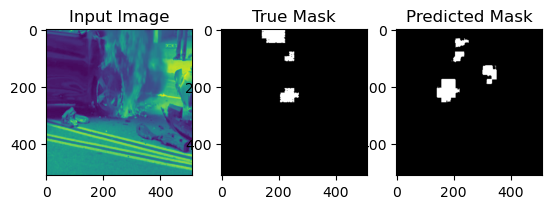

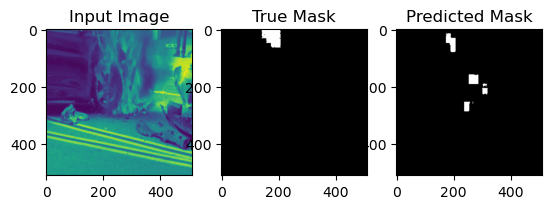

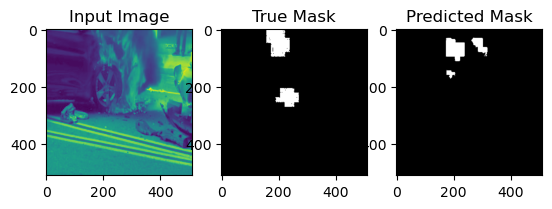

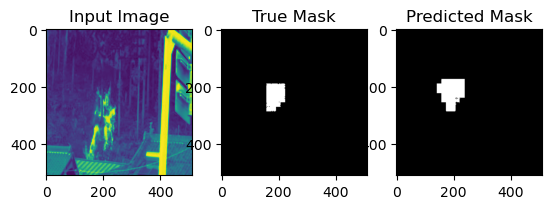

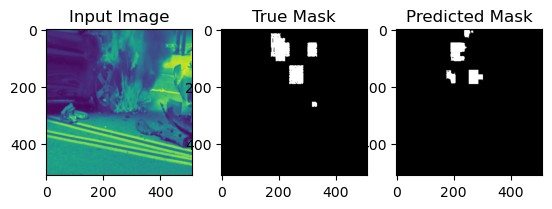

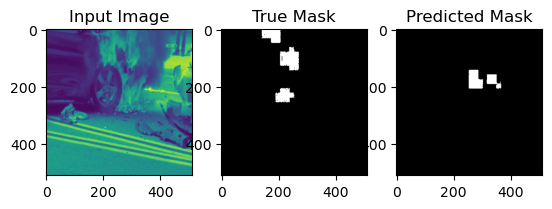

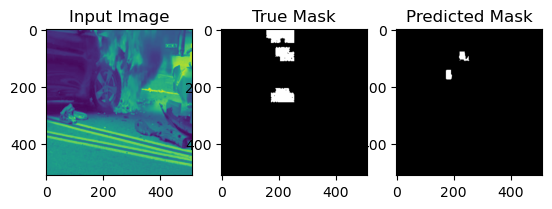

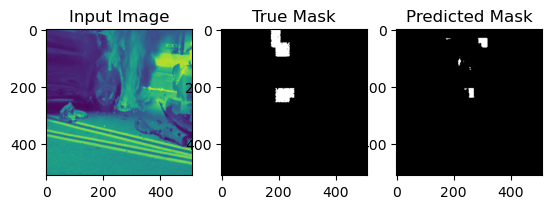

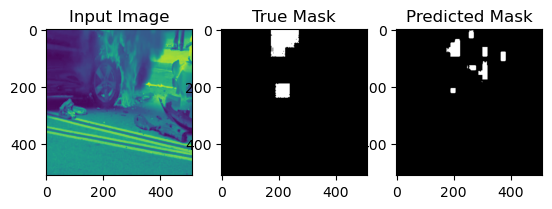

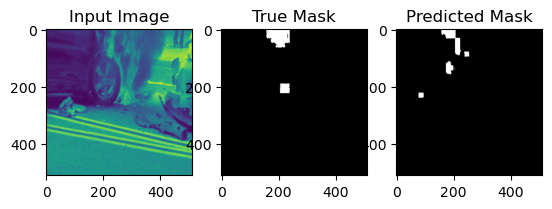

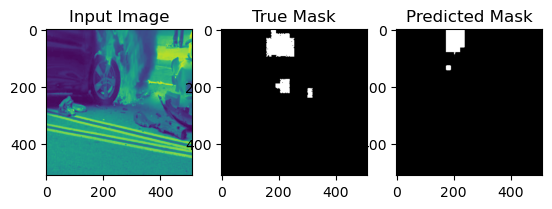

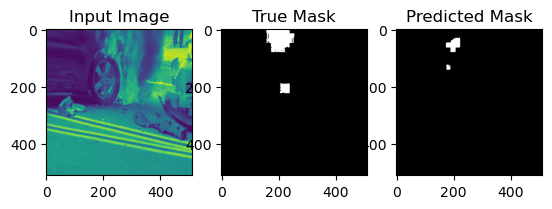

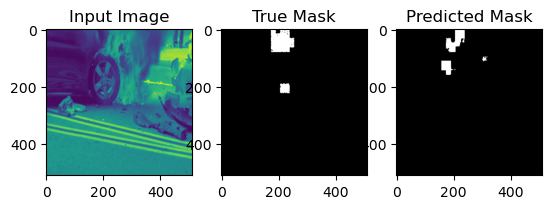

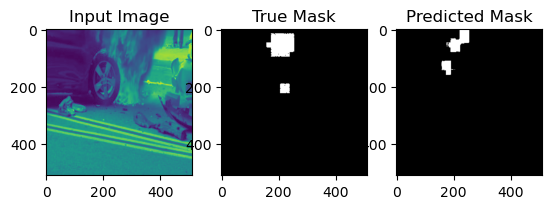

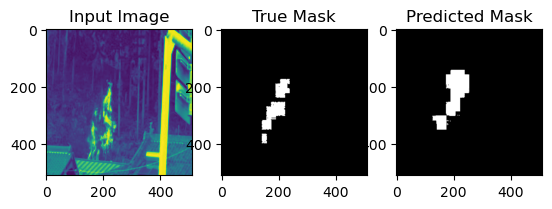

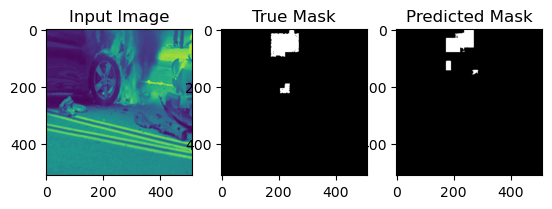

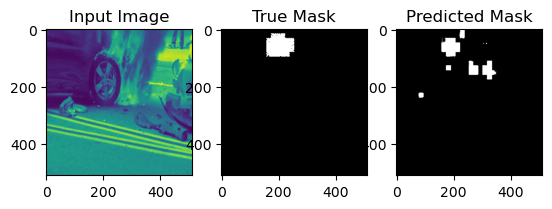

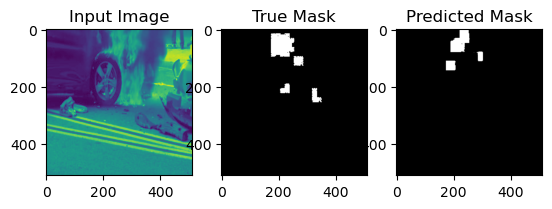

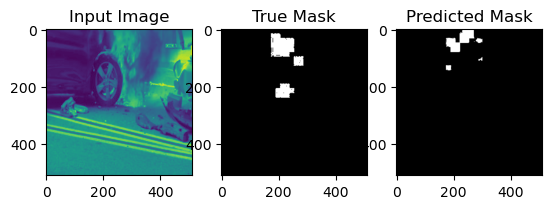

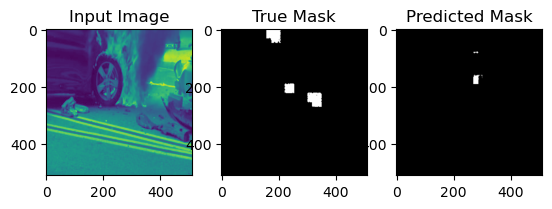

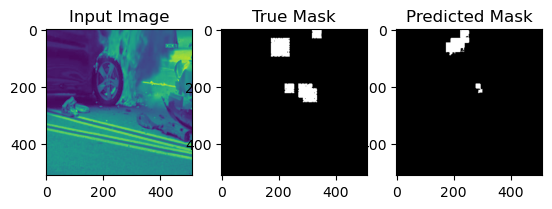

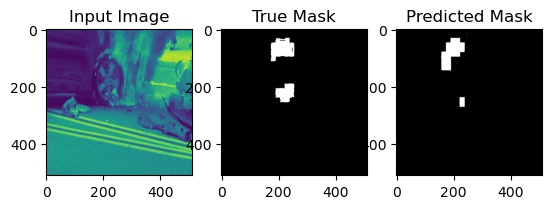

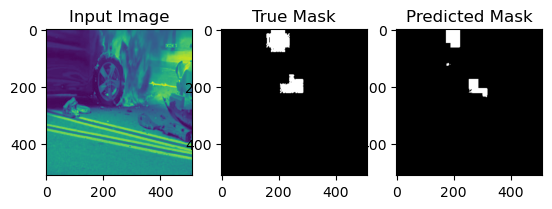

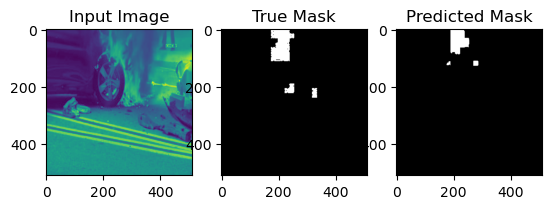

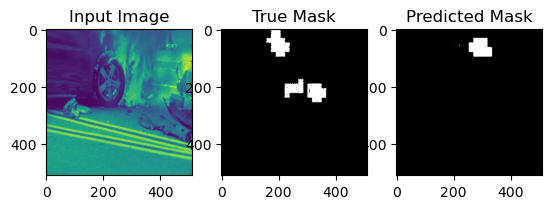

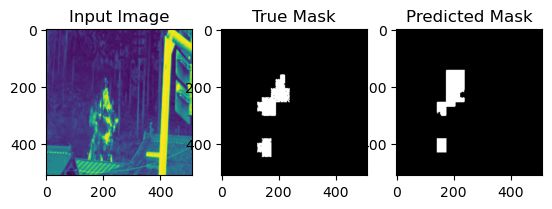

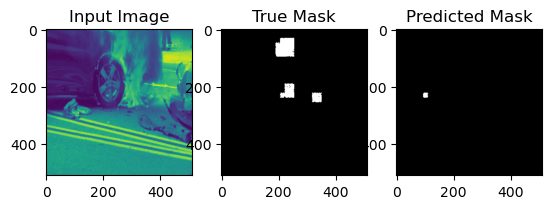

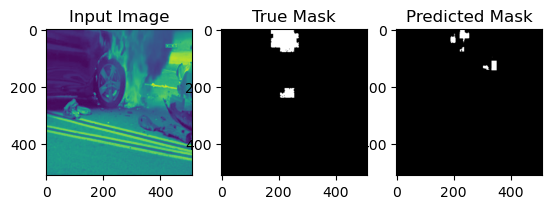

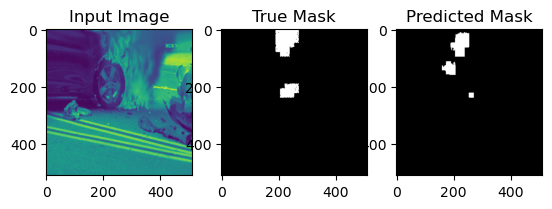

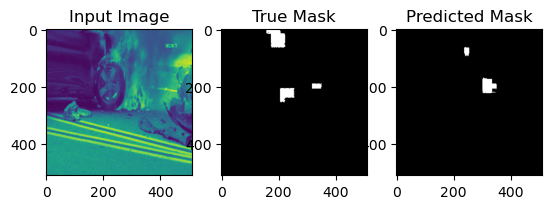

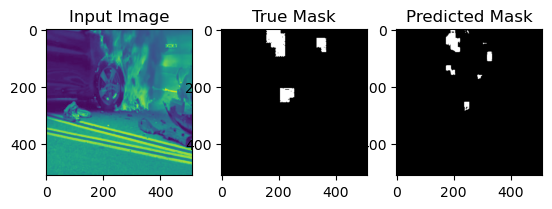

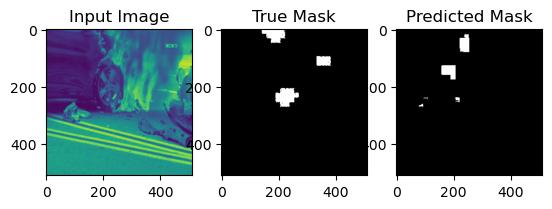

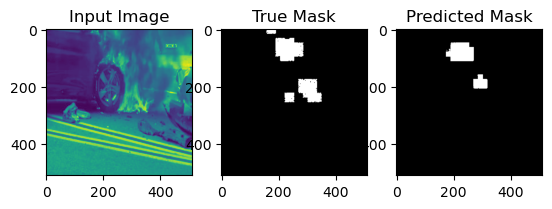

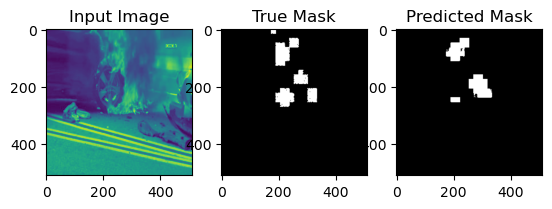

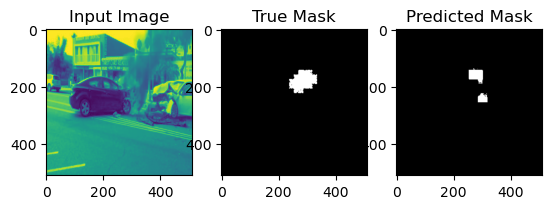

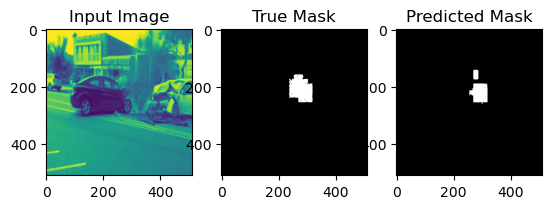

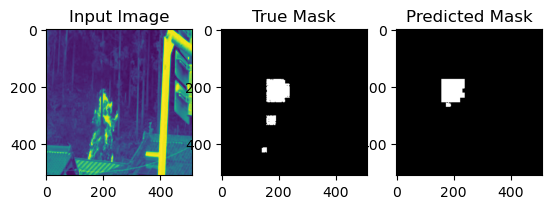

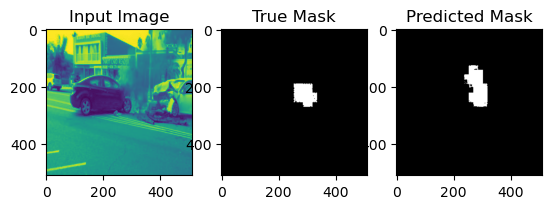

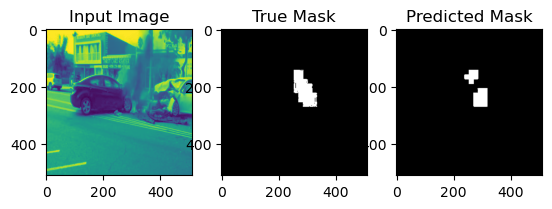

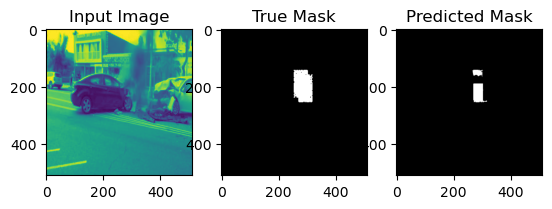

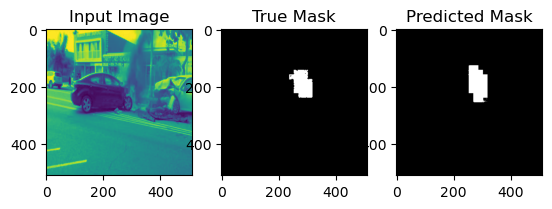

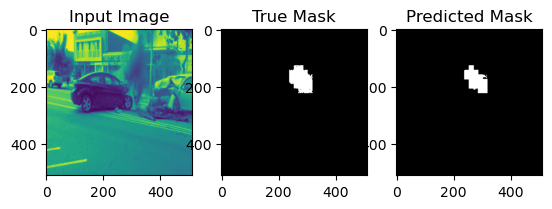

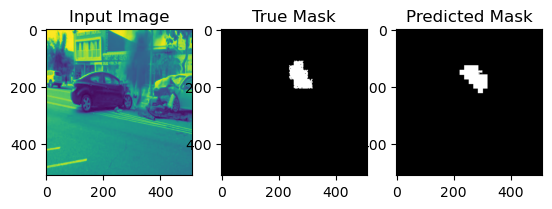

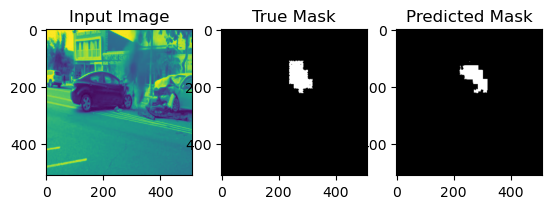

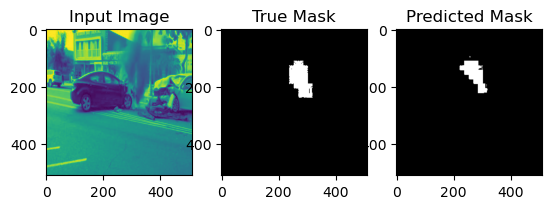

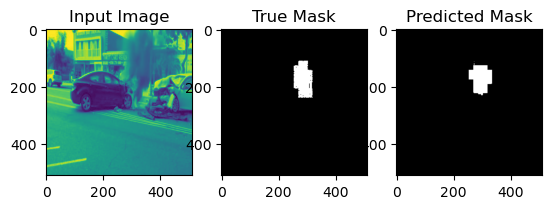

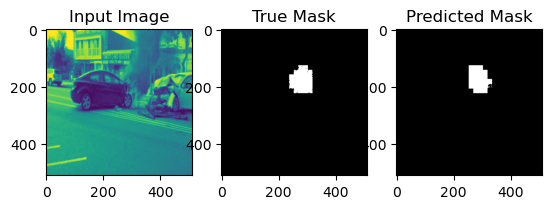

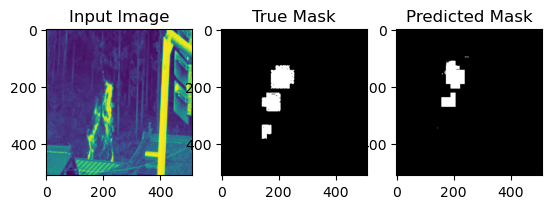

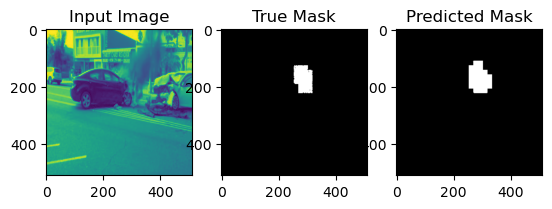

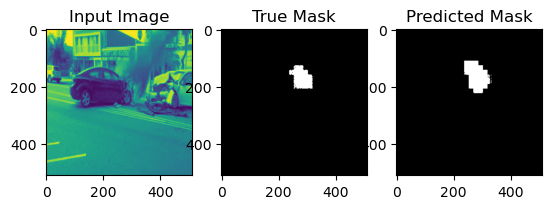

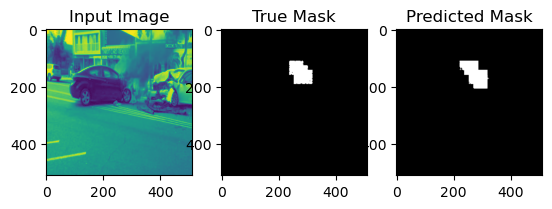

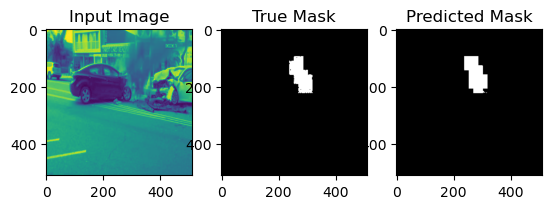

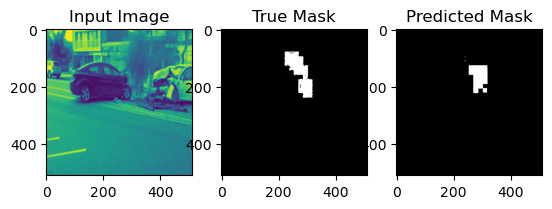

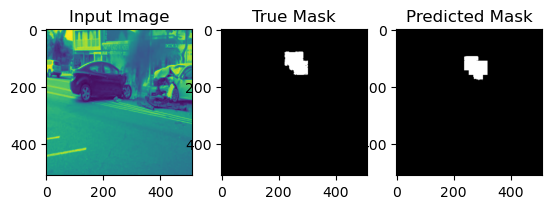

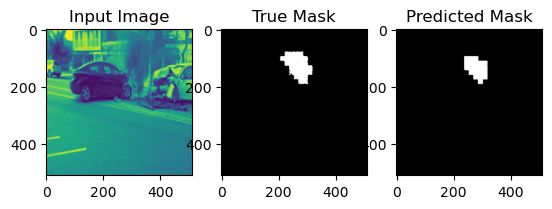

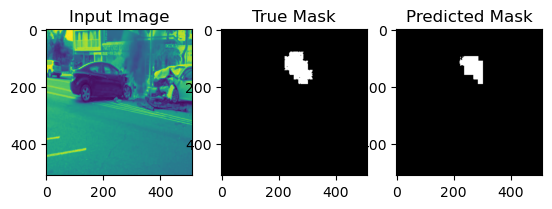

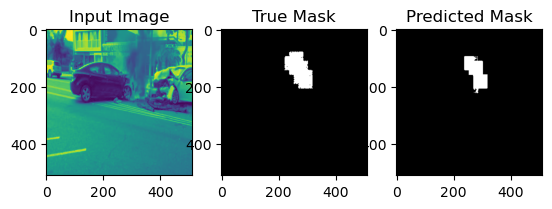

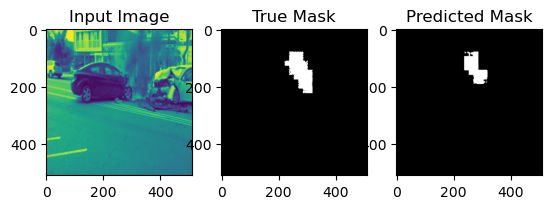

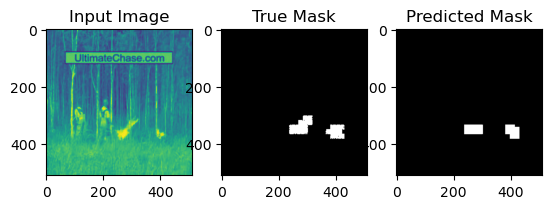

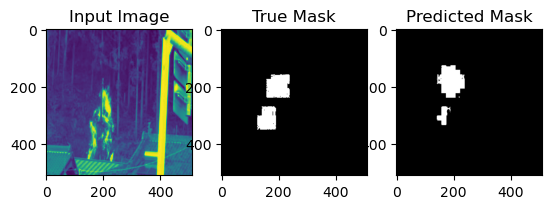

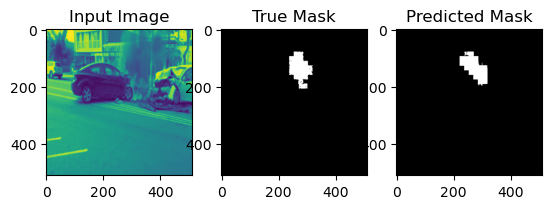

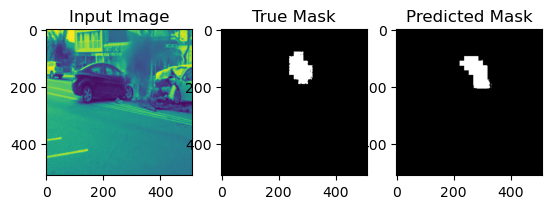

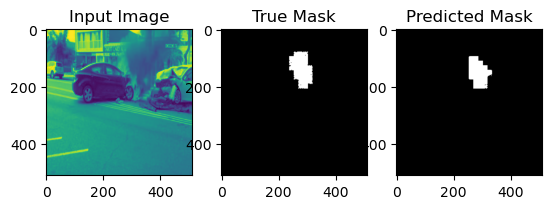

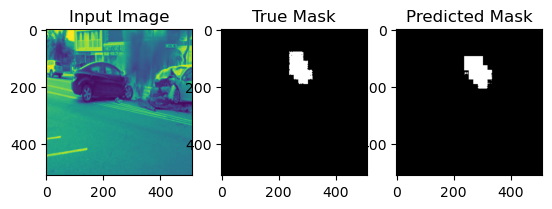

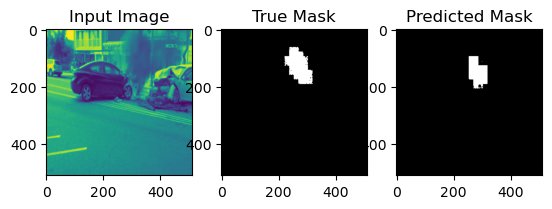

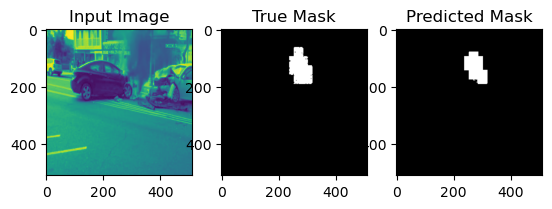

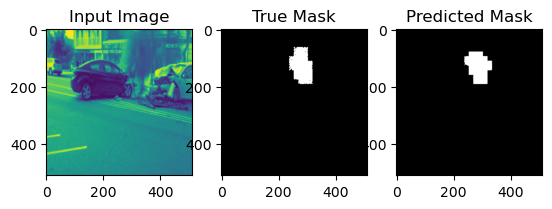

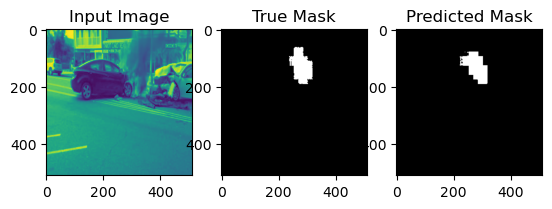

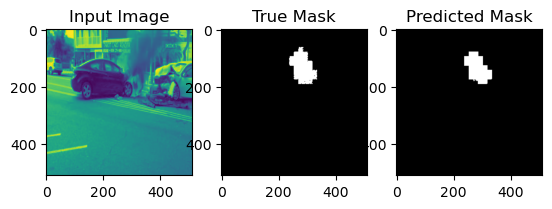

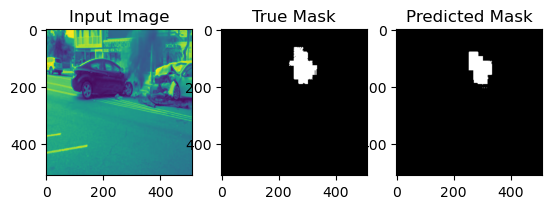

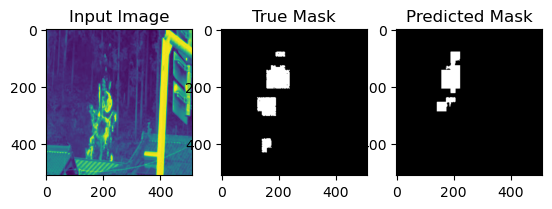

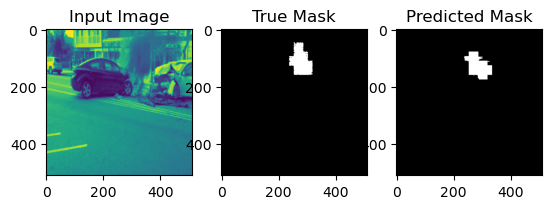

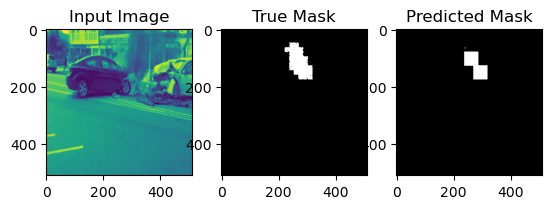

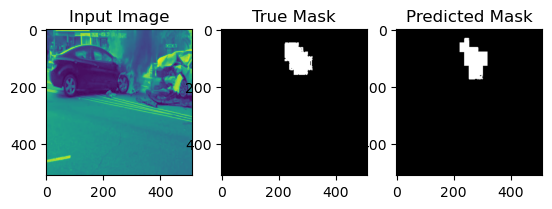

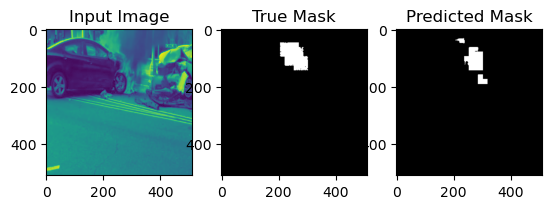

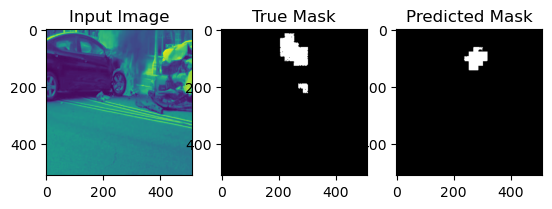

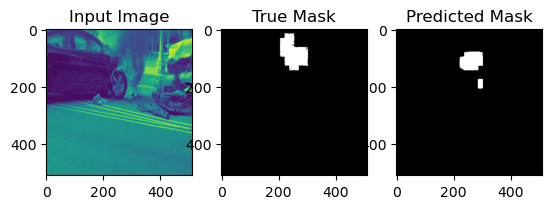

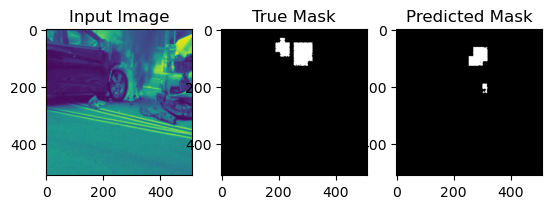

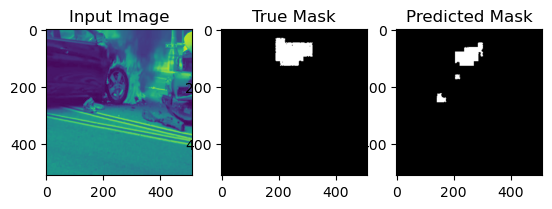

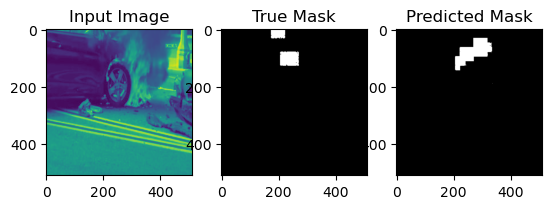

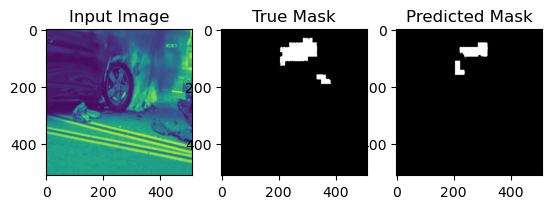

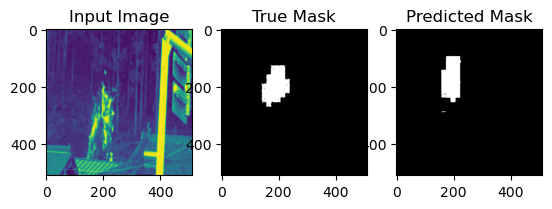

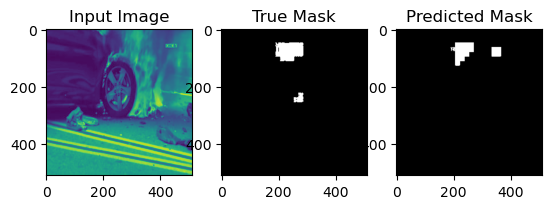

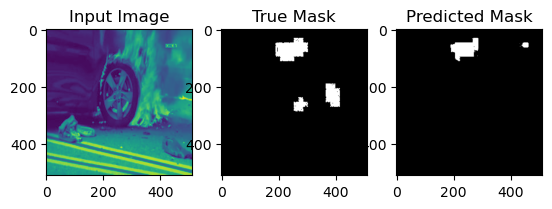

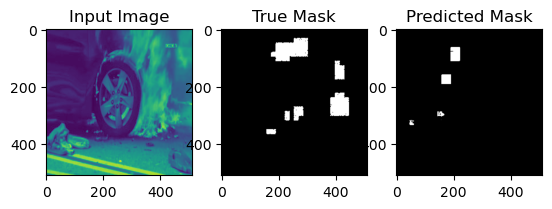

In [19]:
gp2.Util.visualize_predictions(C, X_test, y_test, num_samples=100)

In [20]:
y_pred = R.classifier.predict(X_test, y_test)

In [21]:
y_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [22]:
BareBone = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpx71z76e4kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpkokdi4s1kuc_unet2d


In [23]:
barebone_pred = BareBone.predict(X_test, y_test)

In [24]:
barebone_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [25]:
BareBone.model.metrics_names

['loss', 'dice_coeff']